# **Loan Approval Prediction Description**



## **Import Libraries**

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## **Load Data**

In [221]:
loan_df = pd.read_csv('/content/loan_approval_dataset.csv')
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [222]:
loan_df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [223]:
loan_df = loan_df.drop(columns = ['loan_id'])

In [224]:
loan_df.duplicated().sum()

np.int64(0)

In [225]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [226]:
loan_df.shape

(4269, 12)

In [227]:
categorical_cols = ["education", "self_employed"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [228]:
loan_df.columns = loan_df.columns.str.strip()


In [229]:
X = loan_df.iloc[:, :-1]
y = loan_df.iloc[:, -1]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [231]:
categorical_cols = ["education", "self_employed"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [232]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

## **Logistic Regression**

In [233]:
pipe_lr = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

In [234]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

pipe_lr.fit(X_train_transformed, y_train)
y_pred_lr = pipe_lr.predict(X_test_transformed)

y_test_cleaned = [str(x).strip() for x in y_test]
y_pred_lr_cleaned = [str(x).strip() for x in y_pred_lr]

print("Logistic Regression Accuracy:", accuracy_score(y_test_cleaned, y_pred_lr_cleaned))
print("Logistic Regression Precision:", precision_score(y_test_cleaned, y_pred_lr_cleaned, pos_label='Approved'))
print("Logistic Regression F1:", f1_score(y_test_cleaned, y_pred_lr_cleaned, pos_label='Approved'))
print(classification_report(y_test_cleaned, y_pred_lr_cleaned))

Logistic Regression Accuracy: 0.9320843091334895
Logistic Regression Precision: 0.947069943289225
Logistic Regression F1: 0.9452830188679245
              precision    recall  f1-score   support

    Approved       0.95      0.94      0.95       531
    Rejected       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



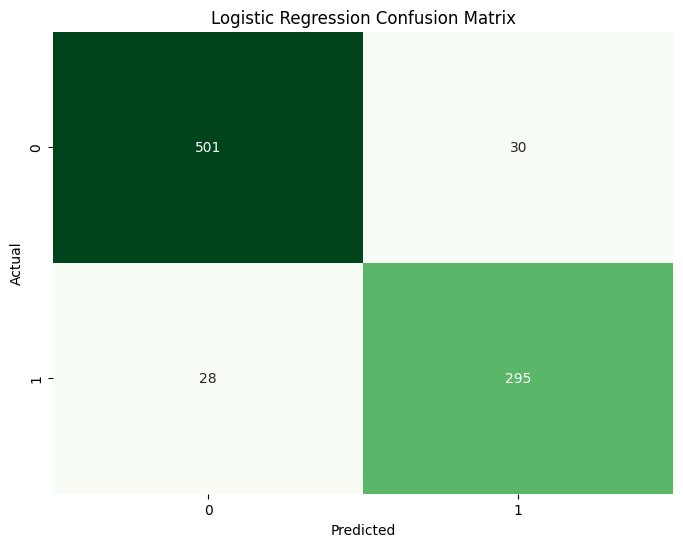

In [235]:
y_test_cleaned = [str(x).strip() for x in y_test]
y_pred_lr_cleaned = [str(x).strip() for x in y_pred_lr]

cm_lr = confusion_matrix(y_test_cleaned, y_pred_lr_cleaned)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## **Decision Tree Classifier**

In [236]:
pipe_dt = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),  # Not required for tree but okay in pipeline
    ("model", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
])

In [237]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

pipe_dt.fit(X_train_transformed, y_train)
y_pred_dt = pipe_dt.predict(X_test_transformed)

y_test_cleaned = [str(x).strip() for x in y_test]
y_pred_dt_cleaned = [str(x).strip() for x in y_pred_dt]

print("Decision Tree Accuracy:", accuracy_score(y_test_cleaned, y_pred_dt_cleaned))
print("Decision Tree Precision:", precision_score(y_test_cleaned, y_pred_dt_cleaned, pos_label='Approved'))
print("Decision Tree F1:", f1_score(y_test_cleaned, y_pred_dt_cleaned, pos_label='Approved'))
print(classification_report(y_test_cleaned, y_pred_dt_cleaned))

Decision Tree Accuracy: 0.9765807962529274
Decision Tree Precision: 0.9793621013133208
Decision Tree F1: 0.981203007518797
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       531
    Rejected       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



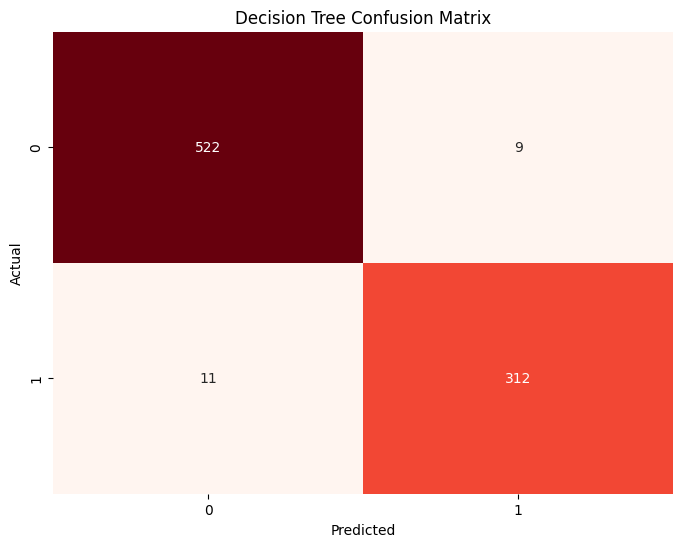

In [238]:
cm_lr = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

## **Prediction**

In [241]:
sample_input = pd.DataFrame([{
    "no_of_dependents": 2,
    "education": "Graduate",
    "self_employed": "No",
    "income_annum": 600000,
    "loan_amount": 200000,
    "loan_term": 12,
    "cibil_score": 750,
    "residential_assets_value": 800000,
    "commercial_assets_value": 200000,
    "luxury_assets_value": 150000,
    "bank_asset_value": 100000
}])

In [242]:
# Predict using Decision Tree pipeline
sample_input_transformed = preprocessor.transform(sample_input)
pred = pipe_dt.predict(sample_input_transformed)

print("\n Loan Approval Prediction :", pred[0])


 Loan Approval Prediction :  Approved
